# OnePlus Mobile Review Sentiment Analysis
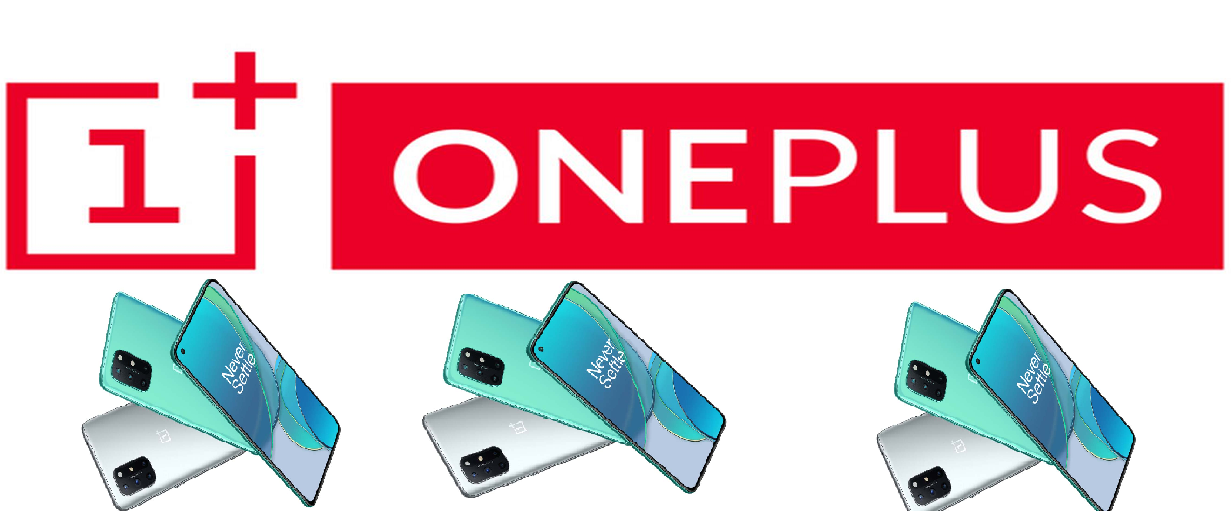

### Import required Libaries

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv
import numpy as np
import matplotlib.pyplot as plt
import logging
from datetime import datetime
from nltk.tokenize import sent_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import heapq
import re
import string

## Load data

In [44]:
def get_soup(url): 
    session = requests.session()
    session.headers['User-Agent'] = "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36"
    session.get("https://www.amazon.in/")
    r= session.get(url)
    if r.status_code==200:
        soup=BeautifulSoup(r.text,'html.parser')
    else:
        print("Amazon site response. Error_code:",r.status_code)
    return soup

In [45]:
def get_reviews(soup):
    page=[]
    cust={}
    reviews=soup.find_all('div',{'data-hook':"review"})
    try:
        for item in reviews:
            cust={
            'Customer':item.find(class_="a-profile-name").text.strip(),
            'Date':date_extract(item.find("span",{"data-hook":"review-date"}).text),
            'Topic':item.find('a',{'data-hook':'review-title'}).text.strip(),
            'Rating':float(item.find('i',{'data-hook':"review-star-rating"}).text[:3]),
            'Content':item.find('span',{'data-hook':'review-body'}).text.strip()}
            page.append(cust)
    except:
        pass
    return page

In [46]:
def date_extract(date):
    n=re.search(r"\d",date).start()
    return(date[n:])

In [70]:
df=pd.DataFrame()

for x in range(200,250):
    print(f"Getting page {x}")
    soup=BeautifulSoup()
    if x==1:
        soup=get_soup(f"https://www.amazon.in/OnePlus-Forest-Green-Storage-SuperVOOC/product-reviews/B09WRKHWP7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
    else:
        soup=get_soup(f"https://www.amazon.in/OnePlus-Forest-Green-Storage-SuperVOOC/product-reviews/B09WRKHWP7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}")
    page=get_reviews(soup)
    if not soup.find('li',{'class':'a-disabled a-last'}):
        pass
    else:
        break
    df=pd.concat([df,pd.DataFrame(page)],axis=0)

Getting page 200


### Here I scraped the Data page wise and stored into local machines

In [71]:
df.shape

(0, 0)

In [ ]:
#export all data to local machine in csv format
#df.to_csv('page7')

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page1.csv')
df2=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page2.csv')
df3=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page3.csv')
df4=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page4.csv')
df5=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page5.csv')
df6=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page6.csv')
df7=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Science Virtual Internship by Careerera\\NLP (Natural Language Processing)\\Sentiment Analysis\\Sraped_reviews\\page7.csv')

In [3]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7])
df.head()

,Unnamed: 0,Customer,Date,Topic,Rating,Content
0,0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...
1,1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc..."
2,2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike
3,3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...
4,4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...


In [34]:
df.shape

(1980, 6)

In [35]:
df.columns

Index(['Unnamed: 0', 'Customer', 'Date', 'Topic', 'Rating', 'Content'], dtype='object')

### Drop Unnamed:0 column

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns

Index(['Customer', 'Date', 'Topic', 'Rating', 'Content'], dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1980 non-null   object 
 1   Date      1980 non-null   object 
 2   Topic     1980 non-null   object 
 3   Rating    1980 non-null   float64
 4   Content   1902 non-null   object 
dtypes: float64(1), object(4)
memory usage: 92.8+ KB


### Missing rows

In [38]:
df.isna().sum()

Customer     0
Date         0
Topic        0
Rating       0
Content     78
dtype: int64

### Drop NAN rows 

In [5]:
df.dropna(inplace=True)
df.isna().sum()

Customer    0
Date        0
Topic       0
Rating      0
Content     0
dtype: int64

In [40]:
df.shape

(1902, 5)

### Rating Count

In [41]:
df['Rating'].value_counts()

5.0    861
1.0    413
4.0    342
3.0    171
2.0    115
Name: Rating, dtype: int64

#### About 50% ratings on the product are 5 star.

### Topic and Content are Similar kind columns, Topic are the highlight of the Content, so we can concat these to columns to create a New column called Text.

In [6]:
df['Text']=df['Topic']+ " " +df['Content']
df.columns=df.columns.str.lower()
df.head()

,customer,date,topic,rating,content,text
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one...,Best option in 35k category. I am using OnePlu...
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the proc...","Camera Stunning camera and breathing design, t..."
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,All are good but Battery back up is not good B...
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 t...,"Battery live not good, it works very less time..."
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back c...,Fast battery drainage In only 3 hrs 50% batter...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   customer  1902 non-null   object 
 1   date      1902 non-null   object 
 2   topic     1902 non-null   object 
 3   rating    1902 non-null   float64
 4   content   1902 non-null   object 
 5   text      1902 non-null   object 
dtypes: float64(1), object(5)
memory usage: 104.0+ KB


### Data Preprocessing

#### To remove some words or replace

In [7]:
def decontract(text):
    text=re.sub(r"won\'t","will not", text)
    text=re.sub(r"can\'t","can not", text)
    text=re.sub(r"n\'t", "not", text)
    text=re.sub(r"\'re", "are", text)
    text=re.sub(r"\'s", "is", text)
    text=re.sub(r"\'d", "would", text)
    text=re.sub(r"\'ll", "will", text)
    text=re.sub(r"\'t", "not", text)
    text=re.sub(r"\'ve", "have", text)
    text=re.sub(r"\'m", "am", text)    
    return text

In [10]:
import nltk
stopword=stopwords.words('english')
lem=WordNetLemmatizer()
stemmer = nltk.SnowballStemmer("english")

def clean(text):
    text = str(text).lower()
    text = decontract(text)                                            # decontracting
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)                   # removing website links
    text = BeautifulSoup(text, 'lxml').get_text()                      # removing html tags
    text = re.sub('<.*?>+', '', text)
    text = re.sub("\S*\d\S*", "", text).strip()                        # removing the words with numeric digits
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text)                             # removing non-word characters
    text = [word for word in text.split(' ') if word not in stopword]
    #text=" ".join(text)
    #text = [stemmer.stem(word) for word in text.split(' ')]
    text = [lem.lemmatize(token) for token in text] #Lemmatization
    text=" ".join(text)
    return text

#### Apply above functions to clean the data

In [11]:
pd.options.display.max_colwidth=100

In [12]:
df["text"] = df["text"].apply(clean)
df.head()

C:\Users\User\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,customer,date,topic,rating,content,text
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one month. It is my first ever OnePlus phone. My pers...,best option category using oneplus one month first ever oneplus phone personal review phone boxy...
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the processor is able in multitasking and we can play heav...",camera stunning camera breathing design processor able multitasking play heavy game smoothly
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,good battery back good battery back dislike
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 to 5 hours only with out seeing videos,battery live good work le time battery poor performanceit stand hour seeing video
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back camera is good but selfie is worst.,fast battery drainage hr battery get drained back camera good selfie worst


### Creating New column Polarity for Sentiment classification

In [14]:
df['polarity']=[TextBlob(i).sentiment[0] for i in df['text']]
df.head()

,customer,date,topic,rating,content,text,polarity
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one month. It is my first ever OnePlus phone. My pers...,best option category using oneplus one month first ever oneplus phone personal review phone boxy...,0.268398
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the processor is able in multitasking and we can play heav...",camera stunning camera breathing design processor able multitasking play heavy game smoothly,0.160000
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,good battery back good battery back dislike,0.350000
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 to 5 hours only with out seeing videos,battery live good work le time battery poor performanceit stand hour seeing video,0.145455
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back camera is good but selfie is worst.,fast battery drainage hr battery get drained back camera good selfie worst,-0.025000


### Sentiment Class

In [15]:
def sentiments(polarity):
    if polarity>0:
        return 'positive'
    elif polarity<0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment']=df['polarity'].apply(sentiments)
df.head()

,customer,date,topic,rating,content,text,polarity,sentiment
0,Dinesh Kumar,7 September 2022,Best option in 35k category.,4.0,I am using OnePlus 10R 8GB 128GB more than one month. It is my first ever OnePlus phone. My pers...,best option category using oneplus one month first ever oneplus phone personal review phone boxy...,0.268398,positive
1,vivek garg,18 March 2023,Camera,4.0,"Stunning camera and breathing design, the processor is able in multitasking and we can play heav...",camera stunning camera breathing design processor able multitasking play heavy game smoothly,0.160000,positive
2,Rahul Ranjan,16 March 2023,All are good but Battery back up is not good,4.0,Battery back up dislike,good battery back good battery back dislike,0.350000,positive
3,lohita,14 March 2023,"Battery live not good, it works very less time",4.0,Battery was very poor performanceIt stands 4 to 5 hours only with out seeing videos,battery live good work le time battery poor performanceit stand hour seeing video,0.145455,positive
4,Manas Mohapatra,6 March 2023,Fast battery drainage,4.0,In only 3 hrs 50% battery gets drained. Back camera is good but selfie is worst.,fast battery drainage hr battery get drained back camera good selfie worst,-0.025000,negative


### Count of sentiment

In [13]:
df['sentiment'].value_counts()

positive    1422
negative     327
neutral      153
Name: sentiment, dtype: int64

#### 70% Reviews are Positive.

### Rating and sentiment

In [14]:
pd.crosstab(df['rating'], df['sentiment'])

sentiment,negative,neutral,positive
rating,,,
1.0,213,66,134
2.0,45,11,59
3.0,46,20,105
4.0,12,15,315
5.0,11,41,809


**Odds in crosstab results-**
1. **there are 11, 5 star rating but sentiment is negative.**
2. **there are 12, 4 star rating but sentiment is negative.**

### Plot WordCloud for Positive, Negative and Neutral Sentiment

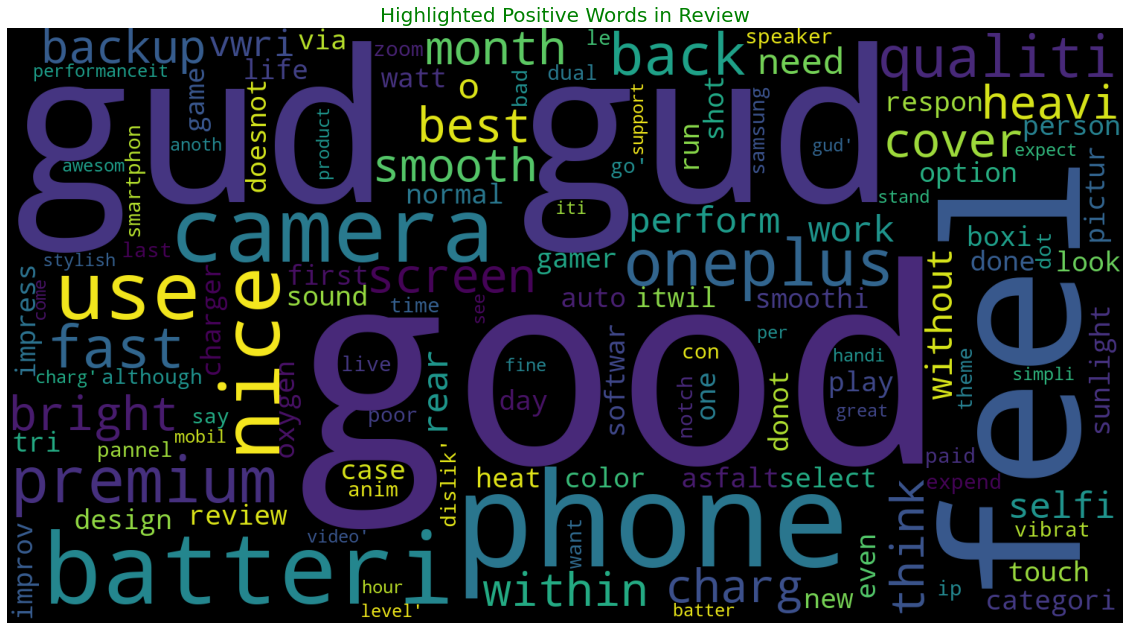

In [53]:
graph=df[df['sentiment']=='positive']
review=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Positive Words in Review", color='green', fontsize=20)
plt.axis('off');

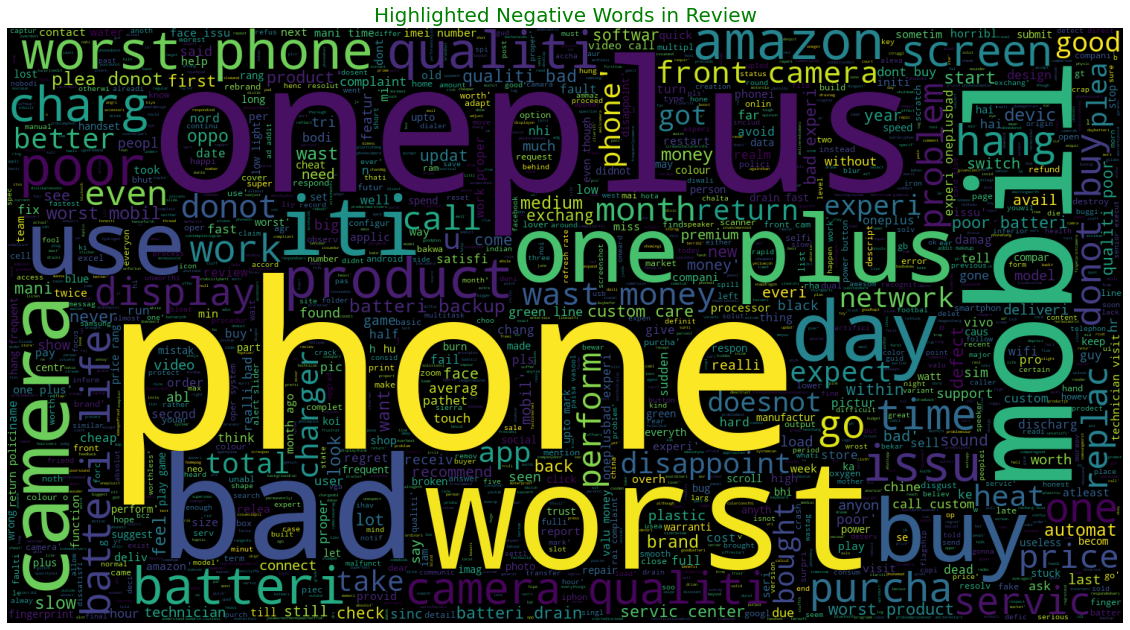

In [54]:
graph=df[df['sentiment']=='negative']
review=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Negative Words in Review", color='green', fontsize=20)
plt.axis('off');

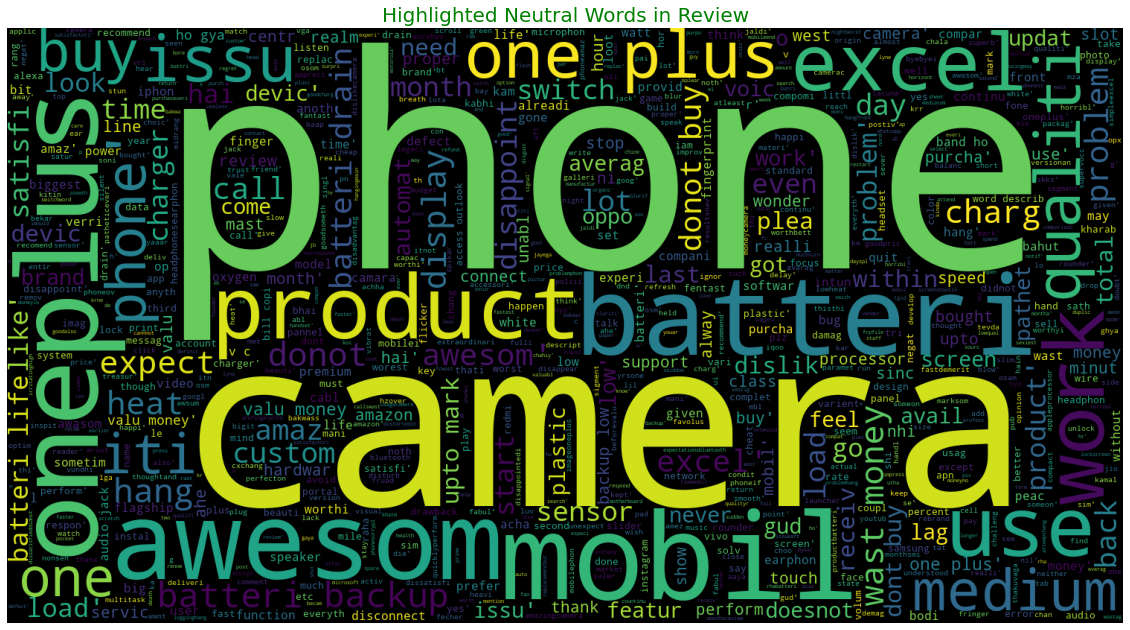

In [55]:
graph=df[df['sentiment']=='neutral']
review=graph['text'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Neutral Words in Review", color='green', fontsize=20)
plt.axis('off');

## Model Developement

In [16]:
df['sentiment_class']=df['sentiment'].replace({'positive':2,'neutral':1,'negative':0})
df['sentiment_class'].value_counts()

2    1422
0     327
1     153
Name: sentiment_class, dtype: int64

### Dependent and Independent features

In [79]:
X=df['text']
y=df['sentiment_class']

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1711,)
(191,)
(1711,)
(191,)


### Convert text to numeric using TD-IDF vectorizer

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
tf_fitted=tf.fit(x_train)
x_train_tf=tf_fitted.transform(x_train).toarray()
x_test_tf=tf_fitted.transform(x_test).toarray()
print(x_train_tf.shape)
print(x_test_tf.shape)

(1711, 3984)
(191, 3984)


### Classification Model

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [102]:
models = {
    "LR": LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "SVM": SVC(random_state=0),
    "NB": GaussianNB(),
    "GB": GradientBoostingClassifier(n_estimators=100, random_state=0),
    "ADA": AdaBoostClassifier(n_estimators=50, random_state=0)
}

In [103]:
for name, model in models.items():
    print('Training Model:', name)
    model.fit(x_train_tf, y_train)
    y_pred = model.predict(x_test_tf)
    print('Training Accuracy:', accuracy_score(y_train, model.predict(x_train_tf)))
    print('Prediction Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Out of {} test records, {} miss classified'.format(y_test.shape[0], sum(y_test!=y_pred)))
    print('*-*'*30)
    print('\n')

Training Model: LR
Training Accuracy: 0.9298655756867329
Prediction Accuracy: 0.8534031413612565
Confusion Matrix:
 [[ 19   0  12]
 [  1   1  15]
 [  0   0 143]]
Out of 191 test records, 28 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: DT
Training Accuracy: 1.0
Prediction Accuracy: 0.8534031413612565
Confusion Matrix:
 [[ 21   2   8]
 [  2  11   4]
 [  8   4 131]]
Out of 191 test records, 28 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: RF
Training Accuracy: 1.0
Prediction Accuracy: 0.8848167539267016
Confusion Matrix:
 [[ 22   1   8]
 [  1  10   6]
 [  3   3 137]]
Out of 191 test records, 22 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: XGB
Training Accuracy: 0.9970777323202805
Prediction Accuracy: 0.9057591623036649
Confusion Matrix:
 [[ 22   2   7]
 

### XGBoost classifier has High Training and Testing Accuracy. Select this Model to Predict Sentiment of Product Review.

In [83]:
xgb=XGBClassifier()
xgb.fit(x_train_tf,y_train)
y_pred=xgb.predict(x_test_tf)
print('Training Accuracy:', accuracy_score(y_train, y_train))
print('Prediction Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Out of {} test records, {} miss classified'.format(y_test.shape[0], sum(y_test!=y_pred)))

Training Accuracy: 1.0
Prediction Accuracy: 0.9057591623036649
Confusion Matrix:
 [[ 22   2   7]
 [  2  13   2]
 [  5   0 138]]
Out of 191 test records, 18 miss classified


### Test the Model

In [98]:
review=[
'''
I got (from OnePlus) the one with 128 GB.
Big problems withh bluetooth: can't find iPhone, JBL speaker, Bolttune headsets, Apple headsets, 
HP laptop, Nissan Murano... It finds my neighbor LG headsets and "ktchen TV", Lenovo laptop. Customer 
supplort didn't help much (doing a wireless reboot and later a factory reset didn't help).
I returned the phone (custom support decided it's a defective phone).
I got (from Amazon) the 256 GB version.
Well, identical problem.
I returned the phone.
''',
'''
I've always been a OnePlus fan. There's one issue with their phones which may lead me to buy a 
different brand. If you plan on using this on Verizon Wifi calling will be unavailable. Second,
if you drop signal the phone doesn't automatically reconnect when you are back in the service area.
You will either have to restart the phone or enter airplane mode for 8 seconds. It's annoying. If 
you are on any other network, I highly recommend this phone. The camera is fantastic. It's fast.
The battery last all day. The 120 screen scrolls flawlessly on pages.
''',
'''
finding out what bad in it, litterly not liked this mobile at all, overall i loved it, not bad 
''',
'''
Worst Product. Battery is bad. Camera is Bad.
'''
]

dd=pd.DataFrame(review, columns=['review'])
dd['review']=dd['review'].apply(lambda x : clean(x))
dd1=tf_fitted.transform(dd['review'])


pred=xgb.predict(dd1)
for i in pred:
    if i==2:
        print('Positive 😍')
    elif i==1:
        print('Neutral 🙂')
    else:
        print('Negative 😡')

Positive 😍
Positive 😍
Negative 😡
Negative 😡


### Using COunt Vectorizer

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [105]:
cvt=CountVectorizer(lowercase=True, stop_words='english', max_df=0.5,min_df=80, ngram_range=(1, 3))
cvt

CountVectorizer(max_df=0.5, min_df=80, ngram_range=(1, 3), stop_words='english')

In [106]:
cvt_fitted=cvt.fit(x_train)
len(cvt_fitted.get_feature_names())

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


44

In [110]:
x_test_tf=cvt_fitted.transform(x_test).toarray()
x_train_tf=cvt_fitted.transform(x_train).toarray()

In [111]:
for name, model in models.items():
    print('Training Model:', name)
    model.fit(x_train_tf, y_train)
    y_pred = model.predict(x_test_tf)
    print('Training Accuracy:', accuracy_score(y_train, model.predict(x_train_tf)))
    print('Prediction Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Out of {} test records, {} miss classified'.format(y_test.shape[0], sum(y_test!=y_pred)))
    print('*-*'*30)
    print('\n')

Training Model: LR
Training Accuracy: 0.8614845119812975
Prediction Accuracy: 0.8481675392670157
Confusion Matrix:
 [[ 23   0   8]
 [  1   1  15]
 [  3   2 138]]
Out of 191 test records, 29 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: DT
Training Accuracy: 0.9532437171244886
Prediction Accuracy: 0.7958115183246073
Confusion Matrix:
 [[ 19   2  10]
 [  2   5  10]
 [  8   7 128]]
Out of 191 test records, 39 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: RF
Training Accuracy: 0.9532437171244886
Prediction Accuracy: 0.8272251308900523
Confusion Matrix:
 [[ 21   1   9]
 [  1   4  12]
 [  6   4 133]]
Out of 191 test records, 33 miss classified
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


Training Model: XGB
Training Accuracy: 0.9327878433664524
Prediction Accuracy: 0.8429319371727748
Confu